# Выпускная квалификационная работа по курсу «Data Science»

В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.

## Изучить теоретические основы и методы решения поставленной задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## Провести разведочный анализ предложенных данных

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [6]:
# Подключаю доступ к файлам данных для гугл драйв
# from google.colab import drive
# drive.mount('/content/drive/')

In [7]:
# Пути для гугл драйв
# nb_path = '/content/drive/MyDrive/Colab Notebooks/'
# data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
# models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [8]:
# Пути для локального запуска
nb_path = ''
data_path = '../data/'
models_path = '../models/'

In [9]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

In [10]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.10.0


In [15]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 4344

In [16]:
# Загружаю исходные данные из файла X_bp
X_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
X_bp.shape
X_bp.info

<bound method DataFrame.info of       Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                73

In [17]:
# Загружаю исходные данные из файла X_nup
X_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

X_bp содержит индекс + 10 признаков и 1023 строк.

X_nup содержит индекс + 3 признака и 1040 строк

Посмотрим список признаков составляющих из базальтопластика:

In [18]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

Посмотрим список признаков составляющих из углепластика:

In [19]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

Необходимо сделать датасет как единый набор данных, объединяя с типом INNER.

In [20]:
# Объединяю датасеты
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

In [21]:
print(df)

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.0

В датасете теперь 1023 строки, остальные строки из таблицы X_nup были отброшены.

In [22]:
# Сохраню объединенные данные
df.to_excel(data_path + 'data_common.xlsx')

In [23]:
# Выведем информацию о типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Все признаки имеют тип float64, признаков с типом "object" отсутствуют - значит нет строковых значений вместо чисел.

In [24]:
# Проверю на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Без пропусков.


In [25]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [26]:
# Посмотрим описательную статистику
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=2)

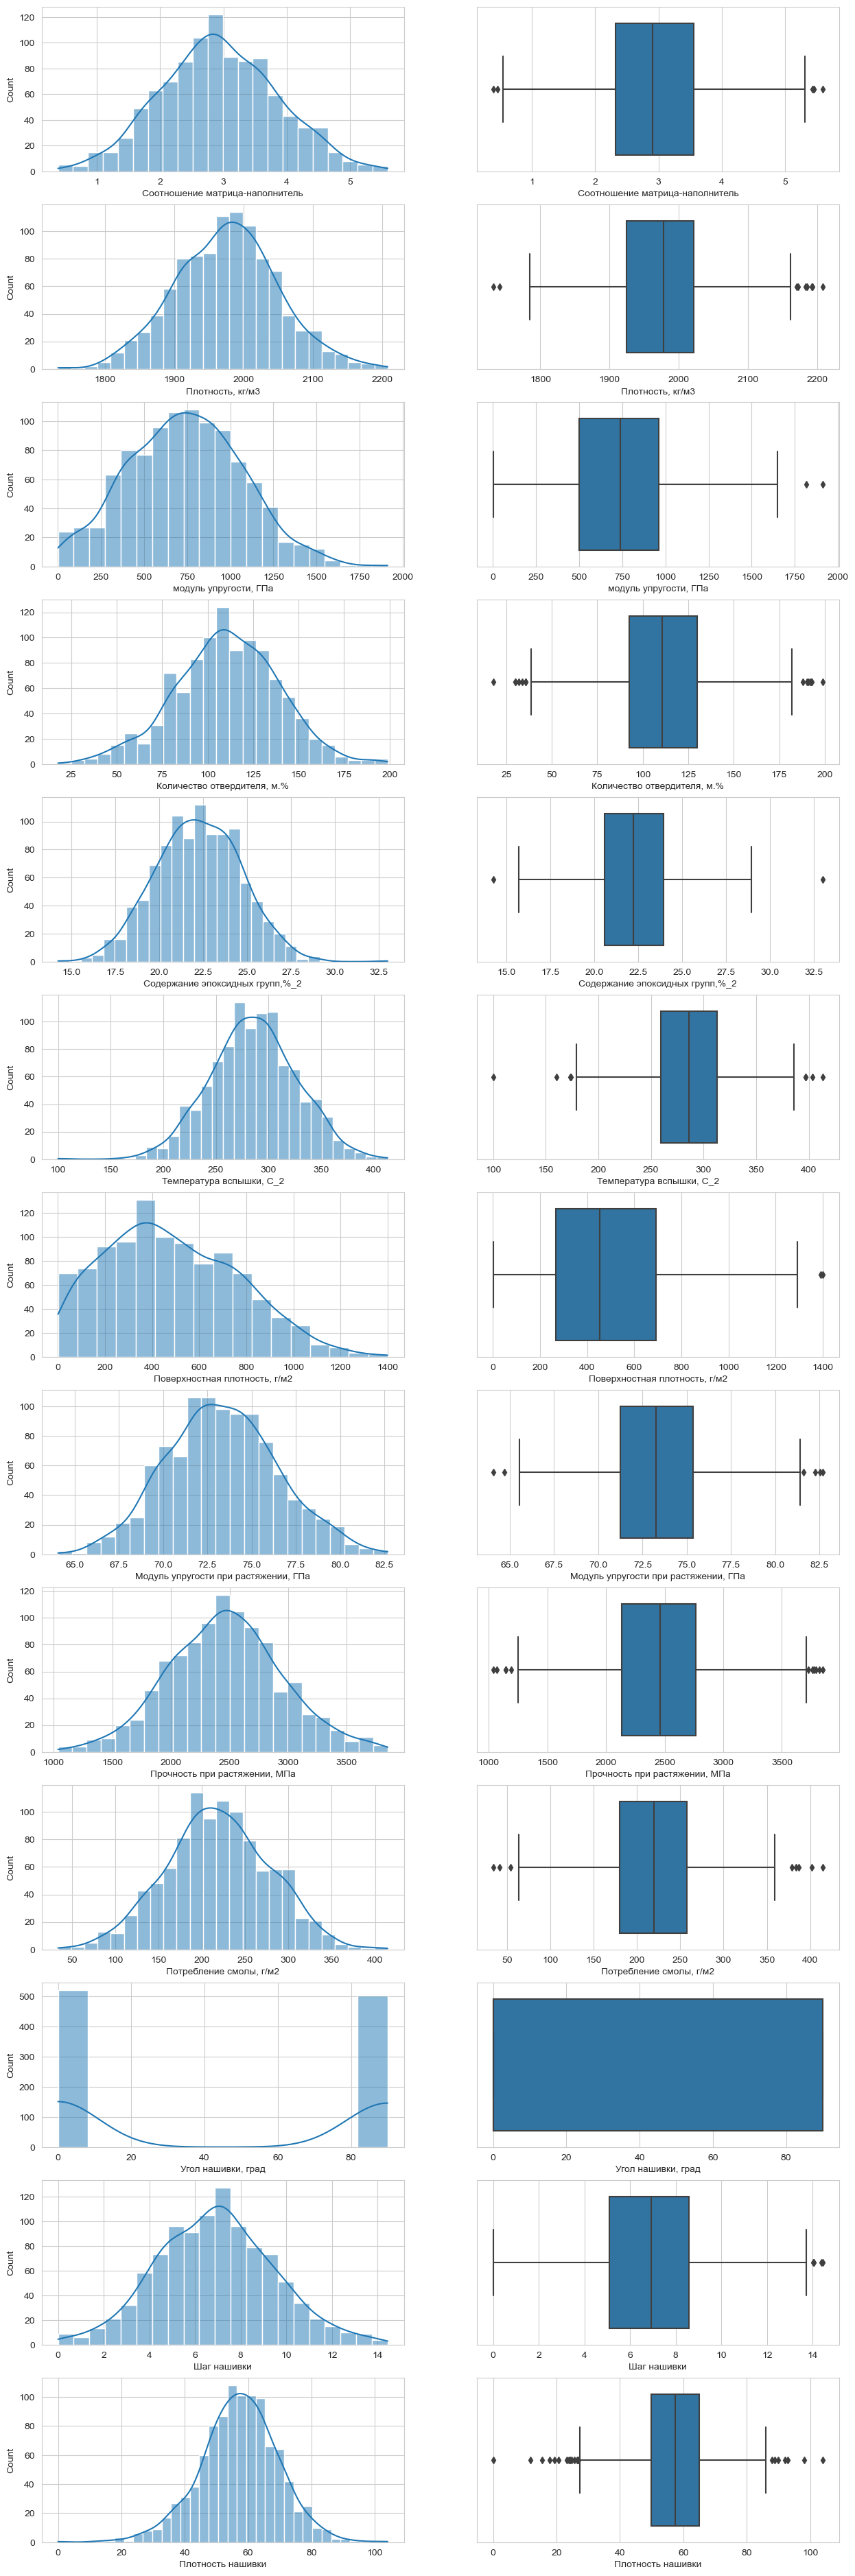

In [27]:
# Для детального стат.анализа построим графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(15, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.
Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения, поэтому переведем в бинарный признак.

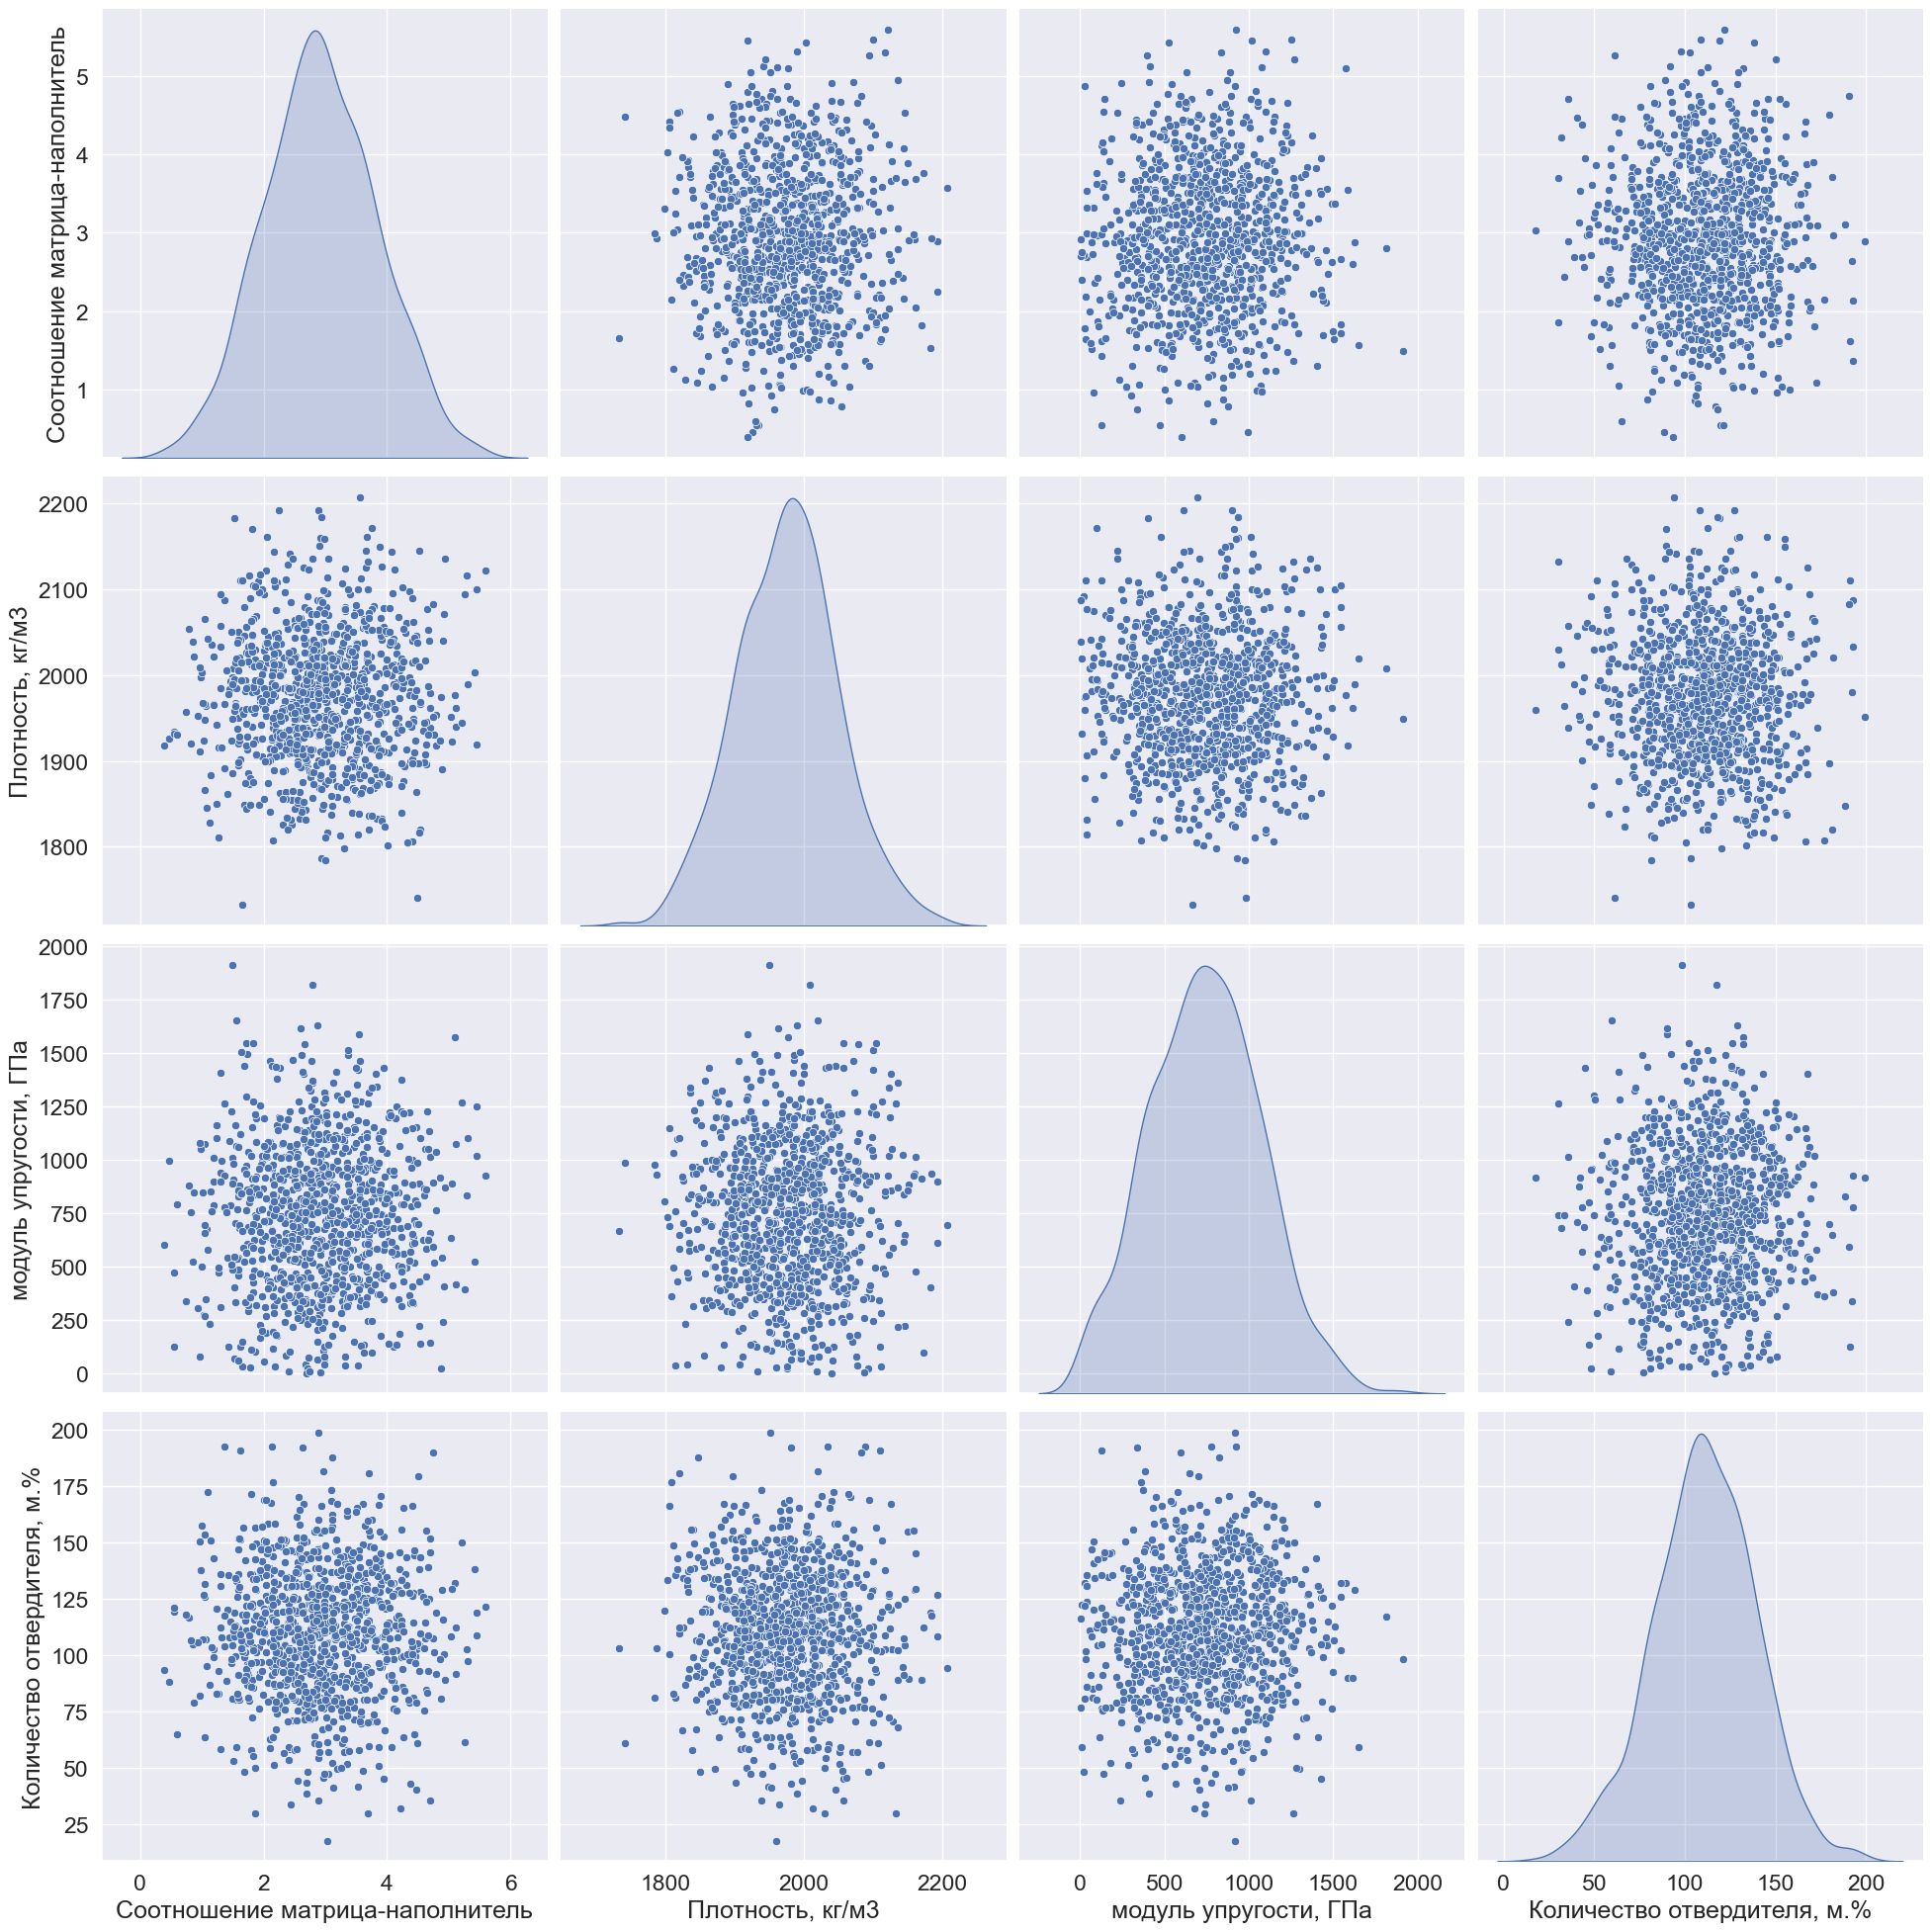

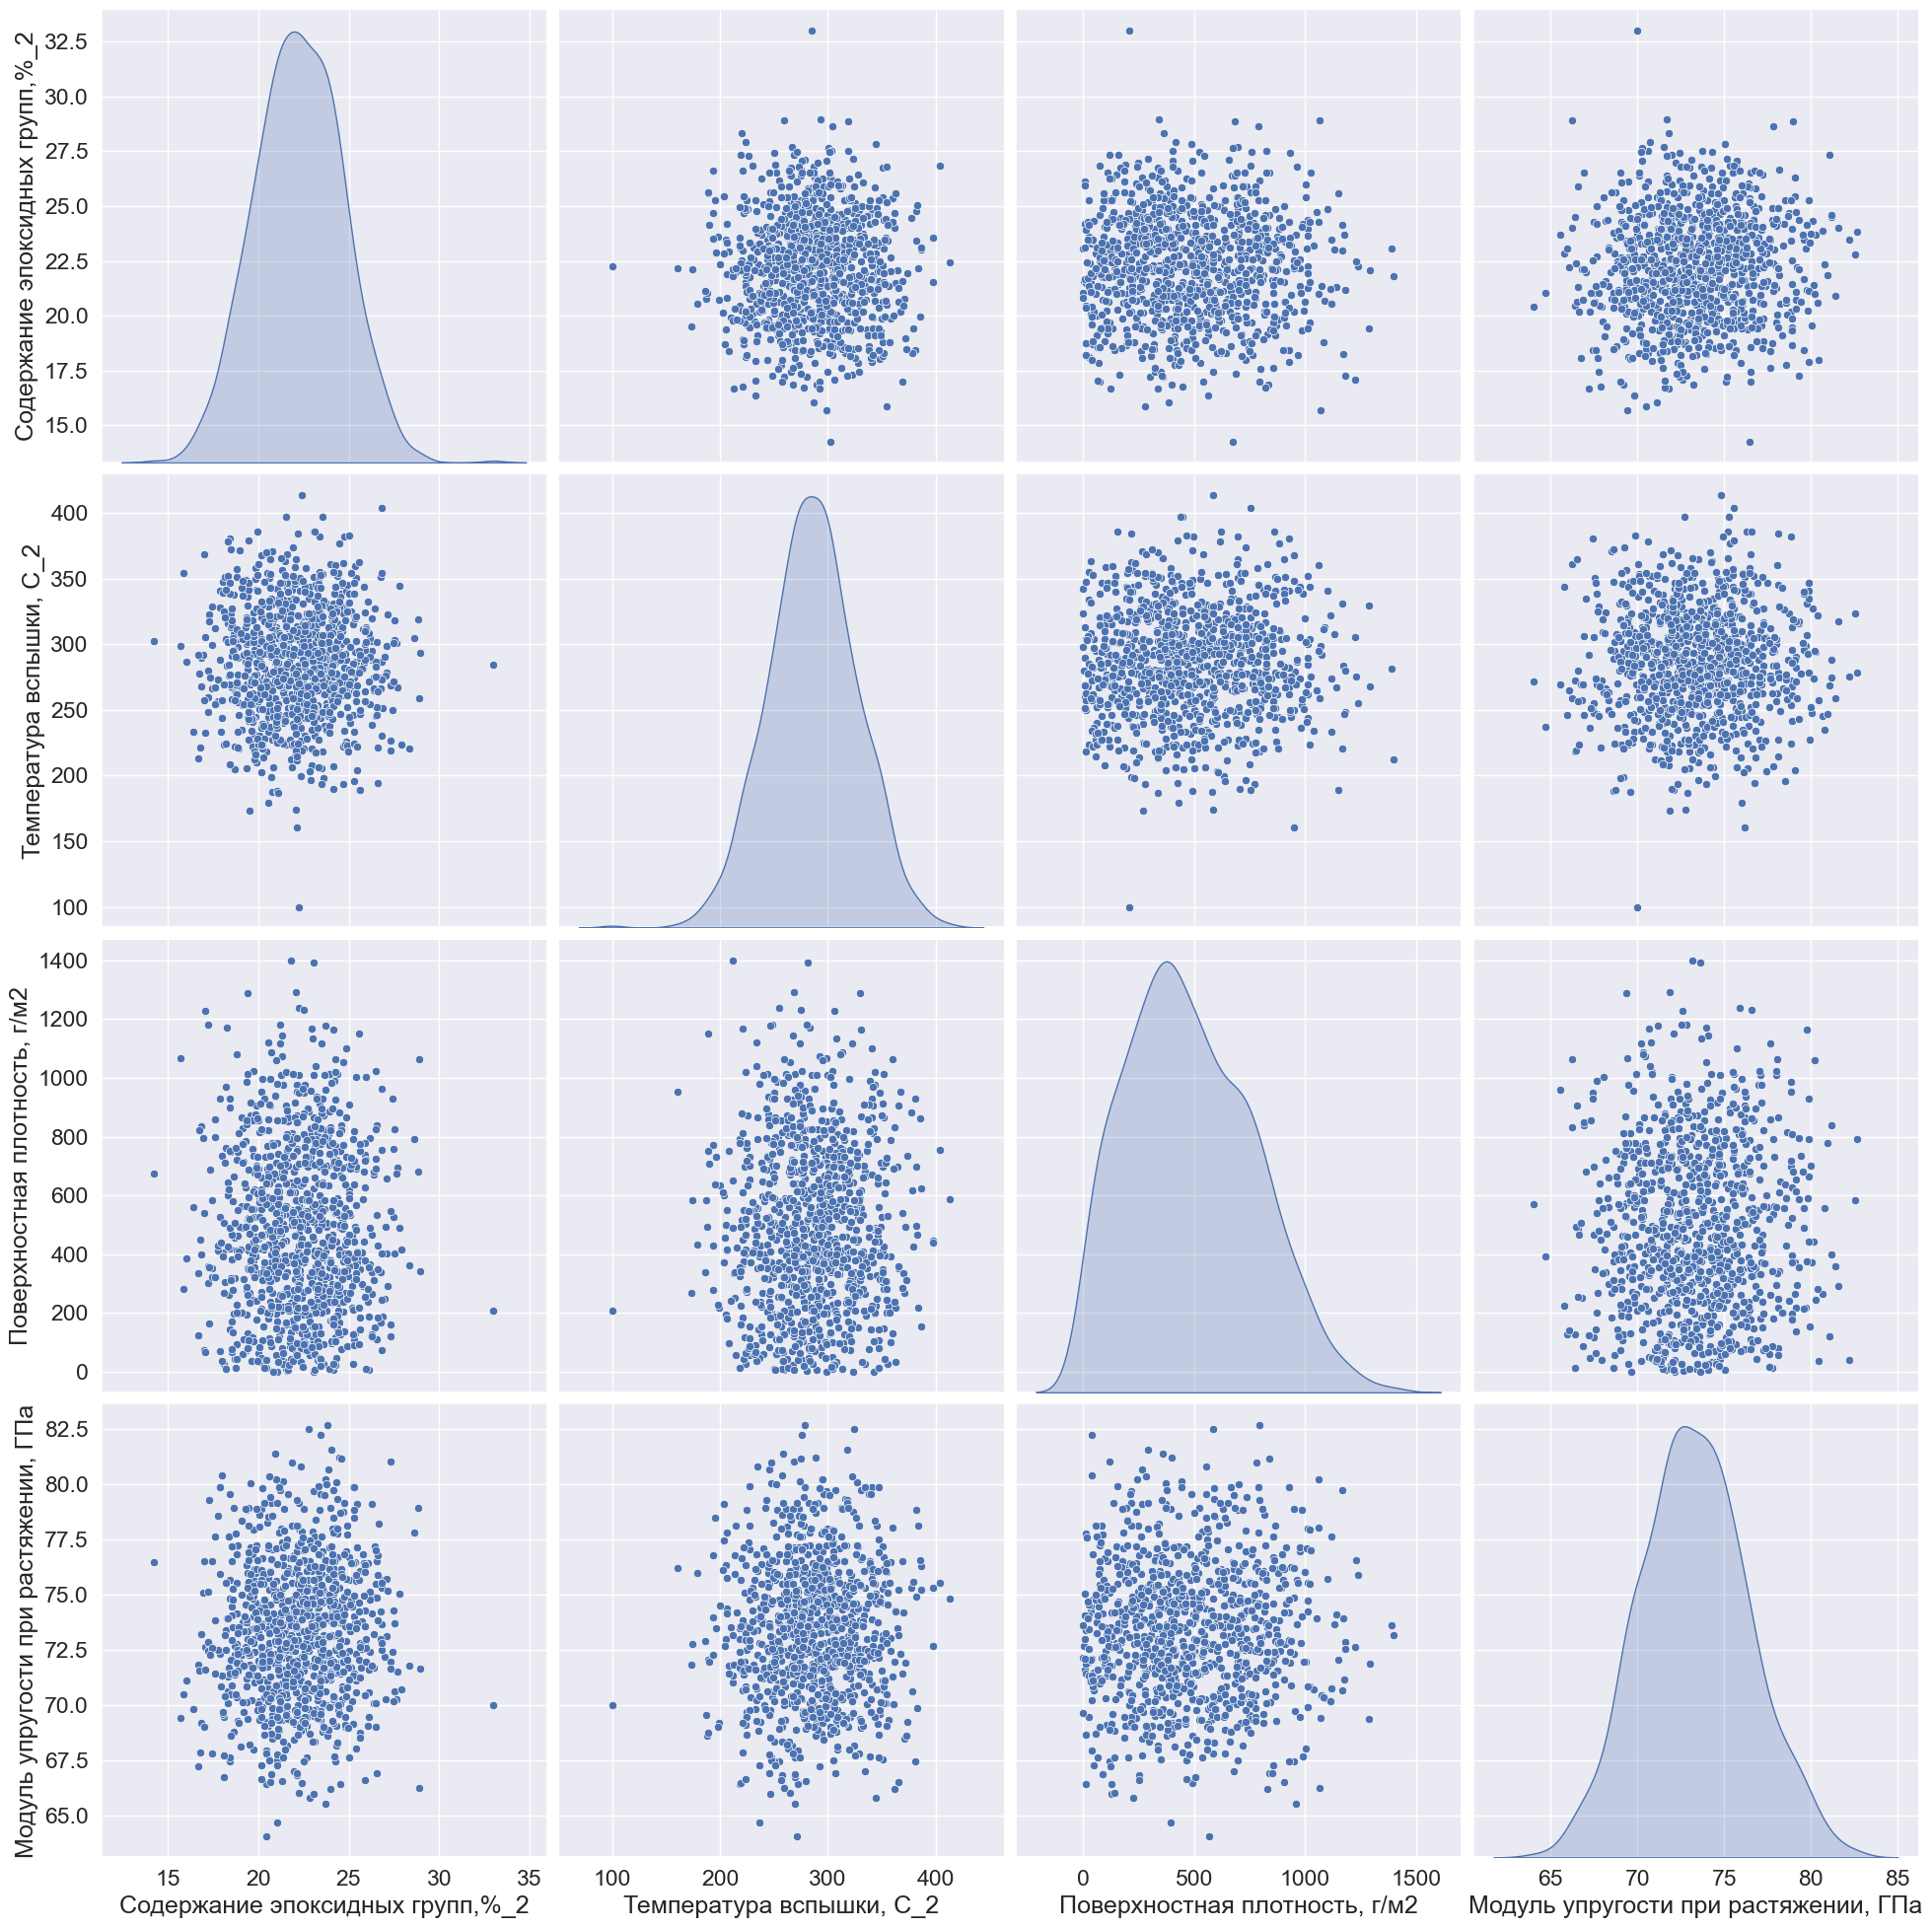

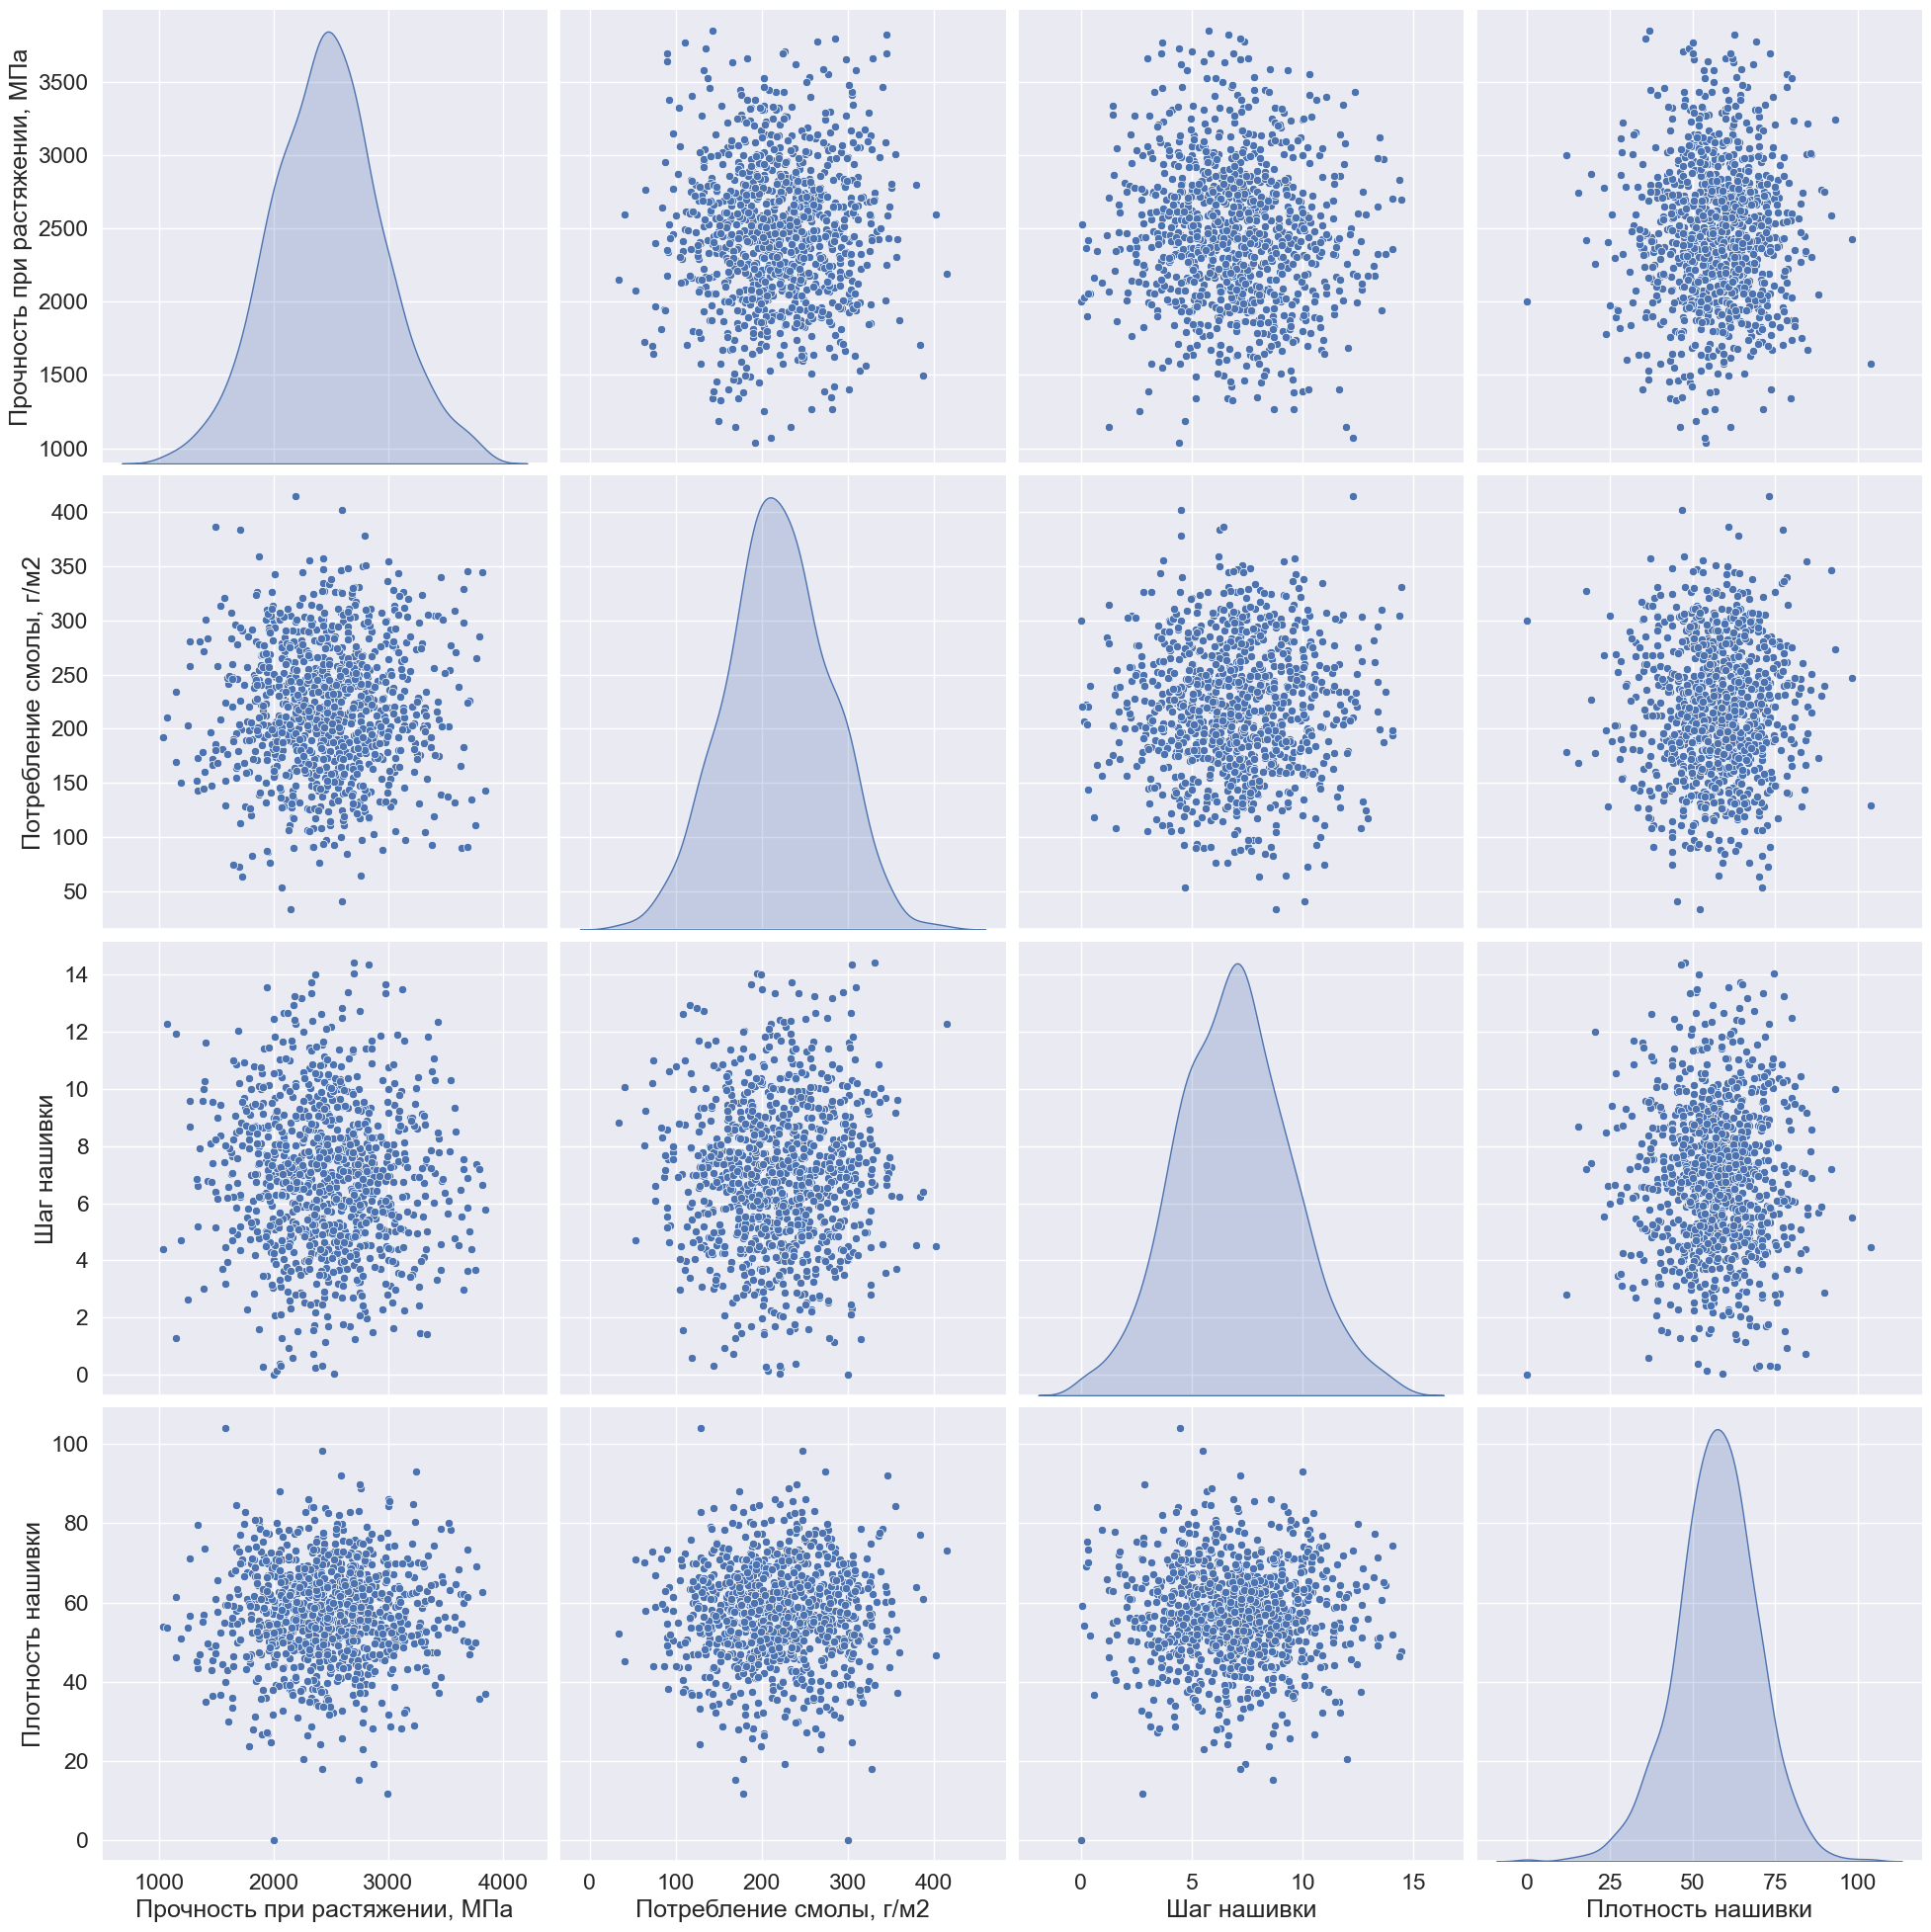

In [19]:
# Построим матрицы диаграмм рассеяния
# Построю попарные графики рассеяния
sns.set_style="white"
sns.set_color_codes=7
sns.set (font_scale= 1.5)
t=sns.pairplot(df,
               vars = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа','Количество отвердителя, м.%'],
               diag_kind="kde",
               height=5);
t=sns.pairplot(df,
               vars = ['Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа'],
               diag_kind="kde",
               height=5);
t=sns.pairplot(df,
               vars = ['Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'],
               diag_kind="kde",
               height=5);

# t.fig.set_size_inches(20,20)
plt.show()
#t_descr

По графикам видно, что выбросы есть. Некоторые точки стоят очень далеко от общего облака.

Находим выбросы.

Для поиска выбросов существуют разные методы: 3-х сигм или межквартильных расстояний. Посмотрим, как они отработают на данном наборе данных.

Соотношение матрица-наполнитель: 3s=0 iq=6


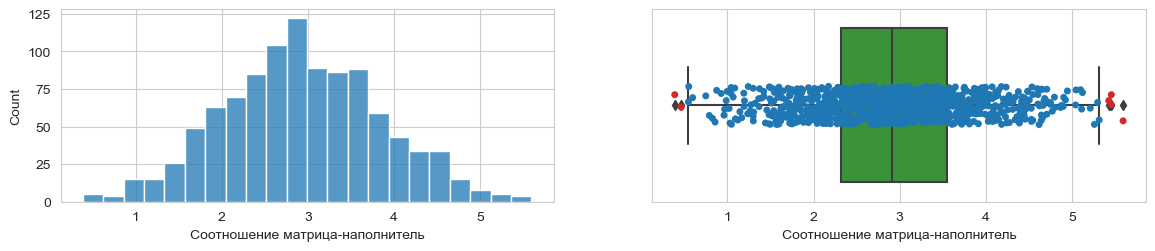

Плотность, кг/м3: 3s=3 iq=9


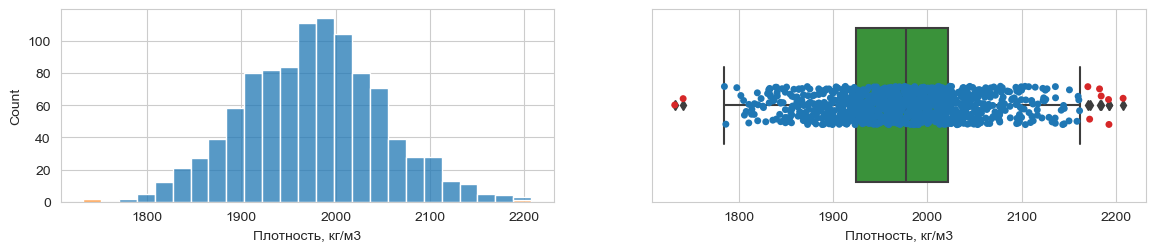

модуль упругости, ГПа: 3s=2 iq=2


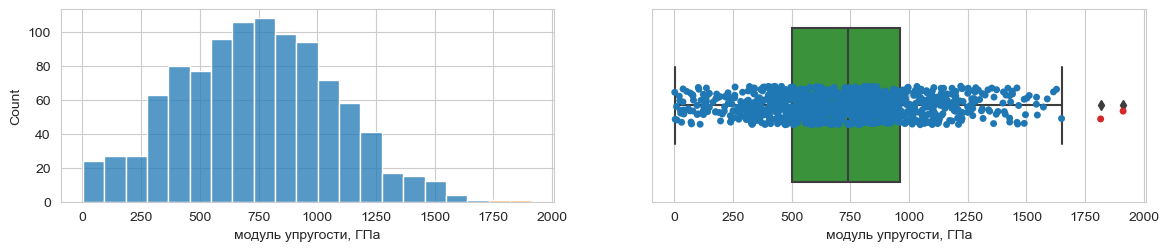

Количество отвердителя, м.%: 3s=2 iq=14


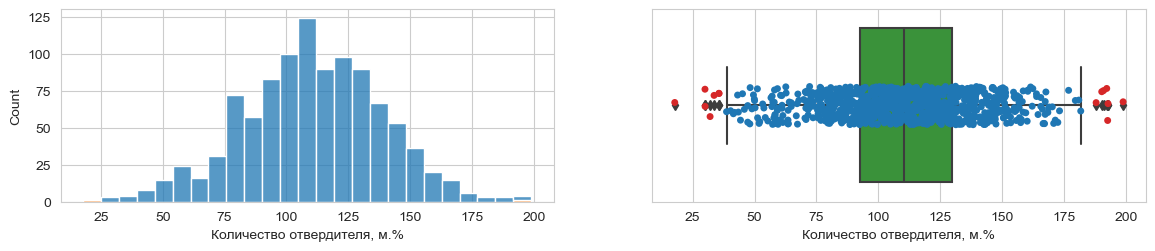

Содержание эпоксидных групп,%_2: 3s=2 iq=2


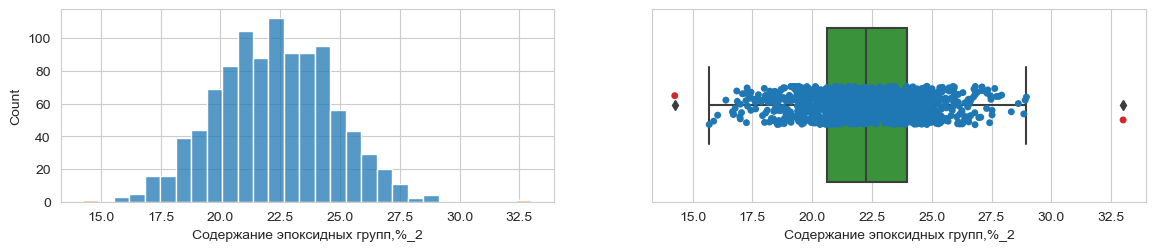

Температура вспышки, С_2: 3s=3 iq=8


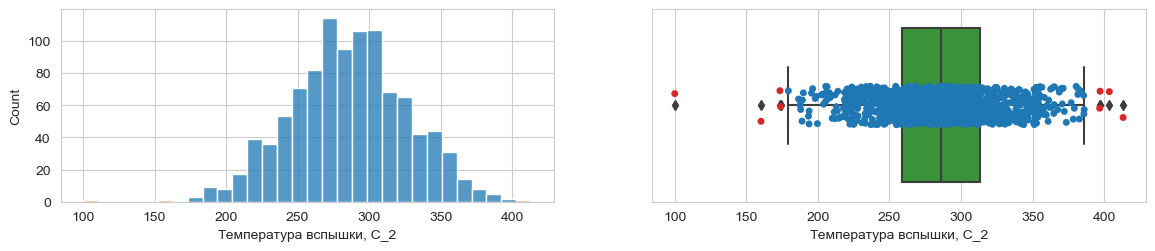

Поверхностная плотность, г/м2: 3s=2 iq=2


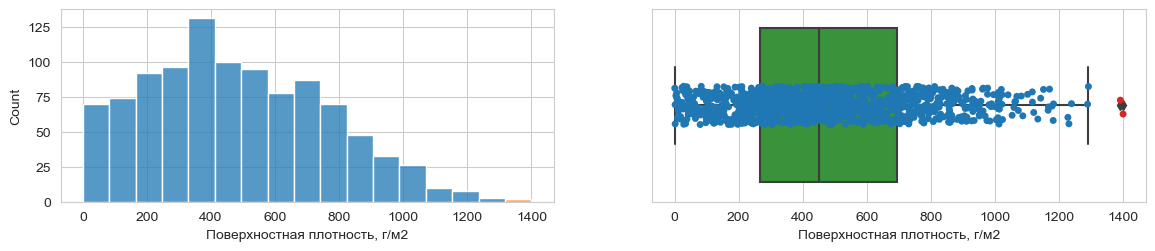

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


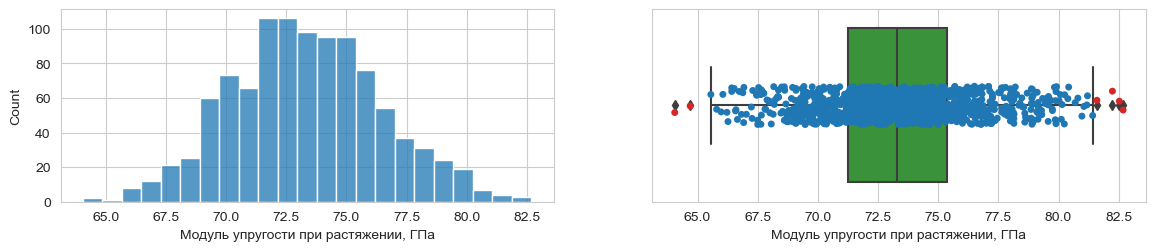

Прочность при растяжении, МПа: 3s=0 iq=11


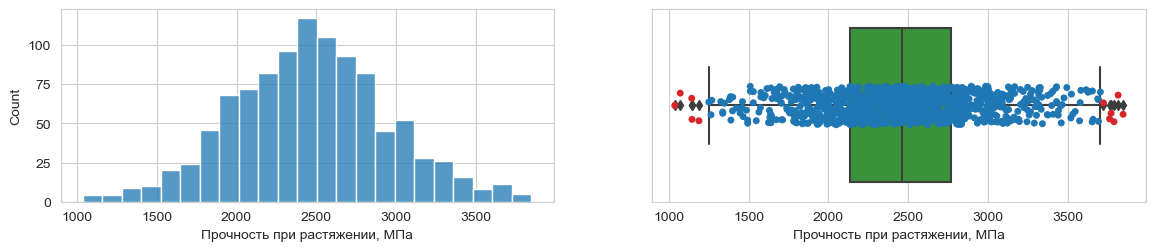

Потребление смолы, г/м2: 3s=3 iq=8


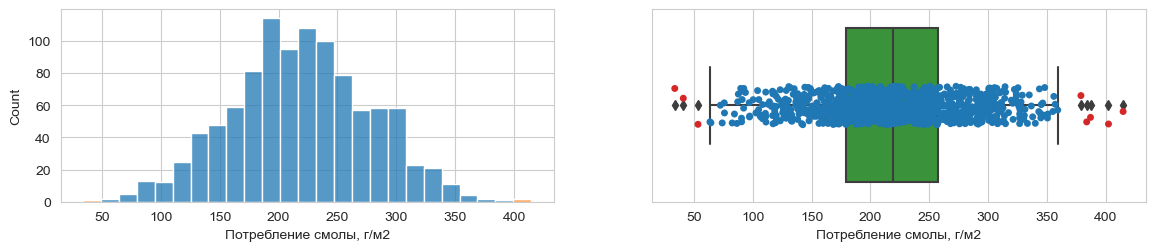

Угол нашивки, град: 3s=0 iq=0


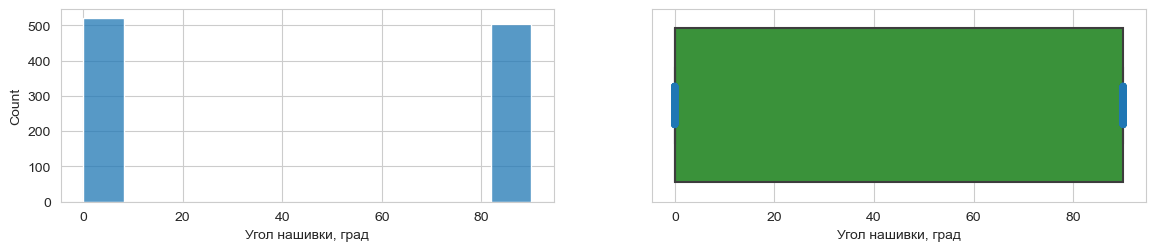

Шаг нашивки: 3s=0 iq=4


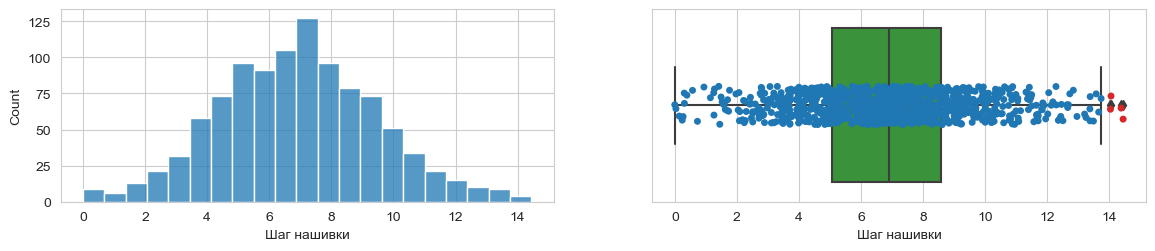

Плотность нашивки: 3s=7 iq=21


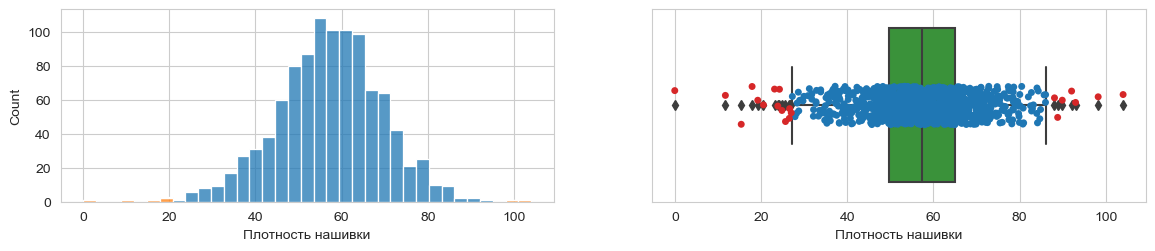

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [28]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(14, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:green', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Вот что получилось:
* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93

На первичных данных буду использовать метод межквартильных расстояний, чтобы получить более "чистые" данные. Но раз датасет уже очищен от явного шума, применим метод 3-х сигм, чтобы потерять меньше значимой информации.

In [29]:
# Удалить выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [30]:
# Очищенные данные тоже стоит сохранить
df.to_excel(data_path + 'data_cleaned.xlsx')

Смущает то, что по внешнему виду графиков мы не видим никаких зависимостей между признаками. То, что входные переменные независимы друг от друга - это хорошо. Но выходые переменные должны как-то зависеть от входных, чтобы модель могла найти эту зависимость и использовать ее для предсказания.

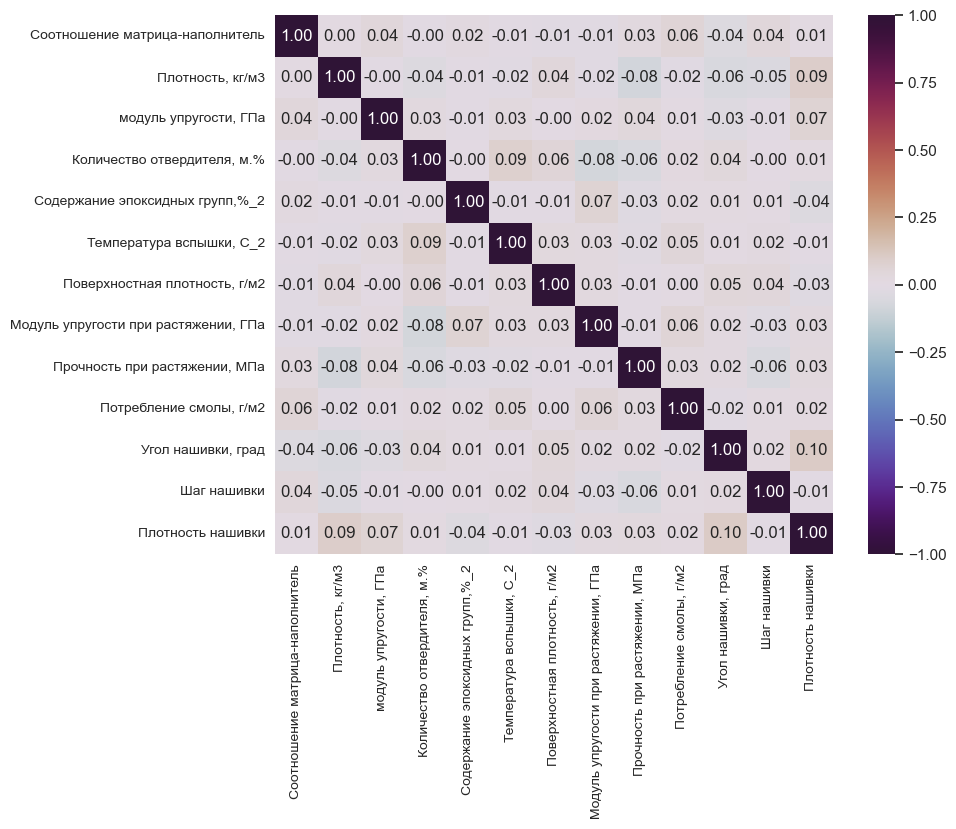

In [31]:
# Попробую рассмотреть матрицу корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.set (font_scale=1)
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Предполагаем, что применение линейных моделей регрессии не даст приемлемого результата.

Смущает то, что по внешнему виду графиков мы не видим никаких зависимостей между признаками. То, что входные переменные независимы друг от друга - это хорошо. Но выходые переменные должны как-то зависеть от входных, чтобы модель могла найти эту зависимость и использовать ее для предсказания.

## Обучить нескольких моделей

В этом разделе необходимо:
* 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
* Провести предобработку данных (нормализация и т.д.).
* При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 

In [32]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel(data_path + 'data_cleaned.xlsx', index_col=0)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

### Разделяем данные на входные и выходные признаки

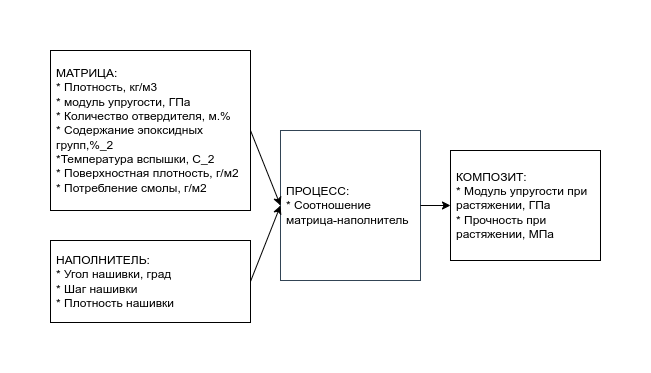

In [33]:
from IPython.display import Image
Image(filename=nb_path + 'process.png')

Статистическими методами мы зависимостей не обнаружили.

Можно предположить, что признаки делятся на:
* свойства матрицы;
* свойства наполнителя;
* свойства смеси и производственного процесса;
* свойства готового композита.

В этом случае целевые признаки имеют зависимости вида:
* модуль упругости при растяжении, Гпа (композит) = f(матрица, наполнитель, процесс);
* прочность при растяжении, МПа (композит) = f(матрица, наполнитель, процесс);
* соотношение матрица-наполнитель (процесс) = f(матрица, наполнитель, композит).

Распределил признаки по группам, как показано на рисунке выше.

Для каждого из целевых признаков построим отдельную модель, следовательно выполним 3 задачи.

In [34]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [35]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [36]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [37]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [38]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [39]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

### Препроцессинг

Далее необходимо выполнить препроцессинг. Его необходимо выполнять после разделения на тренировочную и тестовую выборку, как будто мы не знаем параметров тестовой выборки (минимум, максимум, матожидание, стандартное отклонение). 

Препроцессинг для категориальных и количественных признаков выполняем по-разному.

Категориальный признак один - 'Угол нашивки, град'. Он принимает значения 0 и 90. Использую OrdinalEncoder, чтобы признак принимал значения 0 и 1.

Вещественных количественных признаков у нас большинство. Можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Использую стандартизацию и StandardScaler.

Также препроцессинг необходимо повторить в приложении для введенных данных. Поэтому удобно реализовать предварительную обработку с помощью ColumnTransformer.
Создам объект preprocessor для каждой из 3-х задач.

Выходные переменные не изменяю.

In [82]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

In [85]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [86]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [87]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [88]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаю вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

### Выбор модели

Какую модель использовать? Нужно попробовать разные. Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформим запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [89]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке тоже сделаем вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [90]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [91]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False)
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred)
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred)
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred)
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.

### Модель для модуля упругости при растяжении, ГПа

In [97]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [93]:
# Выполняю препроцессинг входных переменных
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [94]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [109]:
# Описательная статистика входных тренировочных данных до предобработки
show_statistics(x1_train_raw)

In [138]:
# Описательная статистика входных тренировочных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

In [139]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y1_train))

In [140]:
# Сравнение методов прогнозного моделирования:
def_models1 = {
    # Простейший регрессор
    'DummyRegressor': DummyRegressor(strategy='mean'),
    # Линейная регрессия
    'LinearRegression': LinearRegression(),
    # Ридж регрессия снижает размер коэффициентов
    'Ridge': Ridge(),
    # Похожа на ридж, в ней штраф - это сумма значений коффициентов.
    'Lasso': Lasso(),
    # Эпсилон регрессия опорных векторов
    'SVR': SVR(),
    # Регрессия на основе К ближайших соселей
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Ни одна из выбранных мной моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

In [141]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [122]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [142]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
756  {'alpha': 70, 'positive': True, 'solver': 'lbfgs'} -2.577152     1

In [143]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [144]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
5  {'alpha': 0.1} -2.581442     1

In [145]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [146]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

params       MAE  rank
17  {'C': 0.5, 'kernel': 'sigmoid'} -2.583316     1

In [147]:
# Попробую подобрать параметры для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.

In [148]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
13  {'n_neighbors': 29} -2.638205     1

# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [149]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
1    {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 1, 'random_state': 4344, 'splitter': 'random'}   
61    {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'random_state': 4344, 'splitter': 'random'}   
181        {'criterion': 'poisson', 'max_depth': 1, 'max_features': 1, 'random_state': 4344, 'splitter': 'random'}   

          MAE  rank  
1   -2.582909     1  
61  -2.582909     1  
181 -2.582909     1

In [132]:
# Попробую подобрать параметры для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [133]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

C:\Users\ramil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

params  \
19  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 1, 'n_estimators': 100, 'random_state': 4344}   

         MAE  rank  
19 -2.598775    10

In [150]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели.

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Почему-то мне не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

In [151]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [152]:
# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

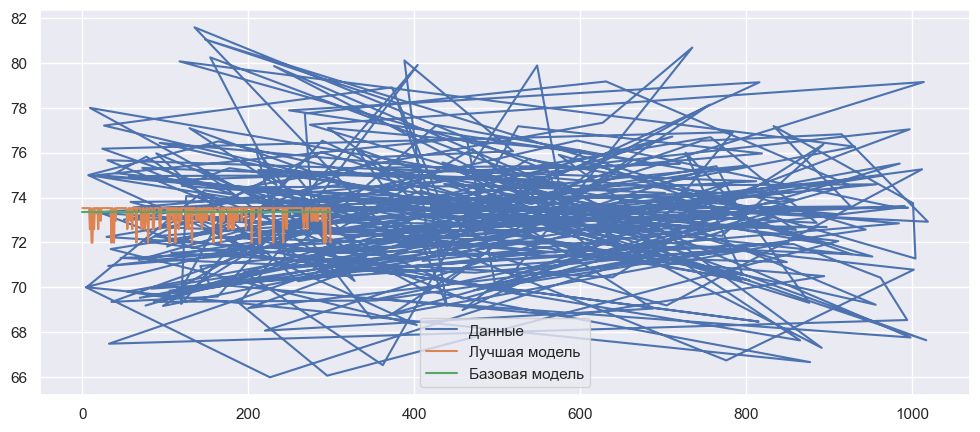

In [153]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным.

In [154]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

C:\Users\ramil\AppData\Local\Temp\ipykernel_16056\2263067557.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))


R2      RMSE       MAE      MAPE  \
Базовая модель                 -0.003897  2.899450  2.293164  0.031448   
Лучшая модель (дерево решений) -0.013159  2.912794  2.302184  0.031535   

                                max_error  
Базовая модель                   8.222378  
Лучшая модель (дерево решений)   8.092000

### Модель для прочности при растяжении, МПа

In [155]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [156]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

In [157]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [158]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [159]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [164]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y2_train))

In [72]:
# Запускаю различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева, сравнимо с базовой моделью.

In [165]:
# Приступаем к поиску лучших моделей
s_models2 = {}

# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [166]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params        MAE  rank
691  {'alpha': 990, 'random_state': 4344, 'solver': 'sag'} -381.23448     1

# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [167]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
6  {'alpha': 40} -381.220708     1

# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [168]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
14  {'C': 0.3, 'gamma': 'scale', 'kernel': 'rbf'} -380.981776     1

# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [169]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
145  {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 3, 'random_state': 4344, 'splitter': 'random'}   

            MAE  rank  
145 -377.565204     1

# Попробую подобрать параметры для модели GradientBoostingRegressor
#
# n_estimators
# The number of boosting stages to perform
#
# loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
# Loss function to be optimized
#
# criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [170]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
1  {'loss': 'squared_error', 'max_depth': 1, 'max_features': 1, 'n_estimators': 100, 'random_state': 4344}   

         MAE  rank  
1 -382.51049     1

In [171]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Подбор гиперпараметров - интересный процесс. Но нам он не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики. 

Метод опорных векторов отработал аналогично линейным моделям.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Но лучший результат дает градиентный бустинг. Значения ошибок примерно такие же, как у дерева решений. Но коэффициент детерминации немного больше, что показывает чуть лучшую объясняющую способность модели.

In [172]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [173]:
# Предсказание лучшей модели
best_model2 = GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50, random_state=RANDOM_STATE)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

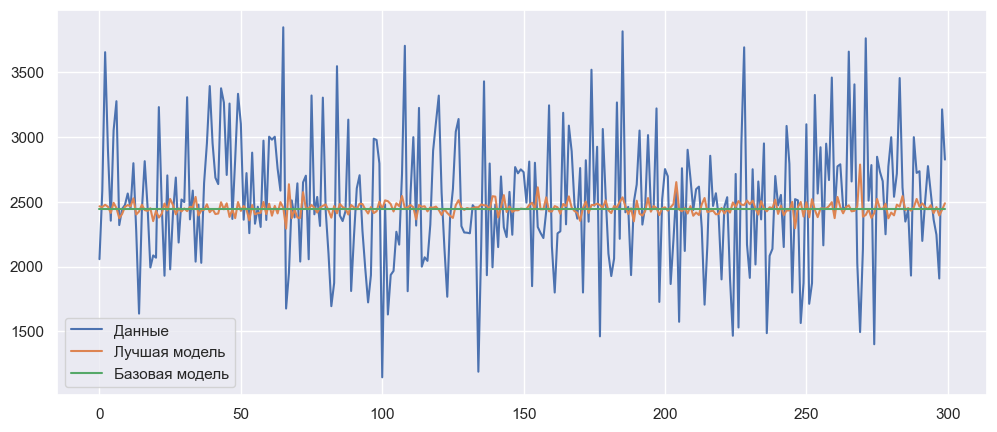

In [174]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты градиентного бустинга с выбранными параметрами, мы видим насколько они плохи и далеки от исходных данных. Но результаты выглядят более "естественно", чем те, что получены деревом решений для модуля упругости при растяжении.

In [176]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))
compare2

C:\Users\ramil\AppData\Local\Temp\ipykernel_16056\1649998241.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))


R2        RMSE         MAE  \
Базовая модель                      -0.016795  497.332204  385.915353   
Лучшая модель (градиентный бустинг) -0.023595  498.992530  387.420047   

                                         MAPE    max_error  
Базовая модель                       0.161962  1402.747538  
Лучшая модель (градиентный бустинг)  0.163368  1392.474237

### Модель для соотношения матрица-наполнитель

In [177]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


In [178]:
# Выполняю препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [179]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [180]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [181]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [183]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y3_train))

По заданию для соотношения матрица-наполнитель необходимо построить нейросеть. 

Но базовая модель DummyRegressor, возвращающая среднее, для оценки качества модели тоже понадобится.

In [184]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

In [185]:
# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Попробую модель MLPRegressor из библиотеки sklearn.

In [186]:
from sklearn.neural_network import MLPRegressor

In [187]:
# Настраиваю нейросеть
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [188]:
%%time
# Запускаю нейросеть
model3_1.fit(x3_train, y3_train)

Iteration 1, loss = 4.48031929
Validation score: -8.600834
Iteration 2, loss = 4.33221286
Validation score: -8.339945
Iteration 3, loss = 4.21766216
Validation score: -8.121395
Iteration 4, loss = 4.12131272
Validation score: -7.929342
Iteration 5, loss = 4.03574432
Validation score: -7.752642
Iteration 6, loss = 3.95625332
Validation score: -7.584167
Iteration 7, loss = 3.87977005
Validation score: -7.420918
Iteration 8, loss = 3.80665811
Validation score: -7.269489
Iteration 9, loss = 3.73711671
Validation score: -7.114941
Iteration 10, loss = 3.66544334
Validation score: -6.948905
Iteration 11, loss = 3.58767103
Validation score: -6.766256
Iteration 12, loss = 3.50267743
Validation score: -6.562058
Iteration 13, loss = 3.40558989
Validation score: -6.328380
Iteration 14, loss = 3.29197817
Validation score: -6.049647
Iteration 15, loss = 3.15559738
Validation score: -5.704104
Iteration 16, loss = 2.98395161
Validation score: -5.256114
Iteration 17, loss = 2.75972898
Validation score:

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=4344, validation_fraction=0.3, verbose=True)

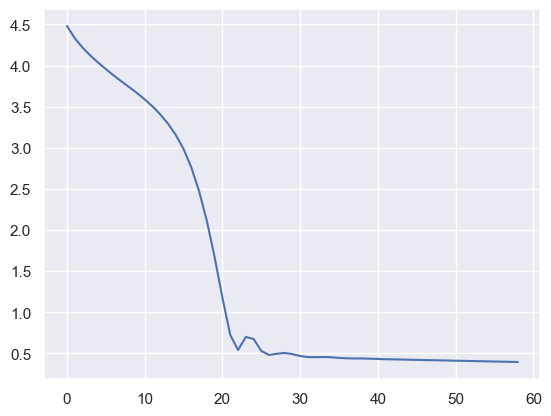

In [189]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [190]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(x3_test)

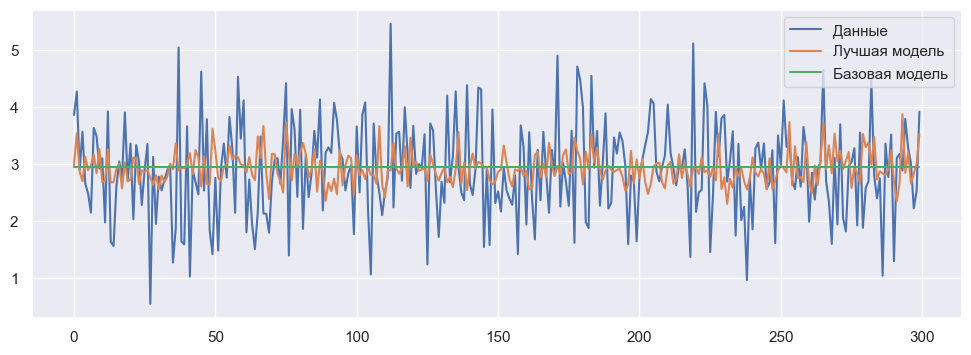

In [191]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [192]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

C:\Users\ramil\AppData\Local\Temp\ipykernel_16056\1547057093.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))


R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.004784  0.837505  0.659057  0.287431   2.501931
MLPRegressor   -0.063913  0.861796  0.693957  0.295178   2.566208

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам значительно хуже, чем у базовой модели. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

# Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [193]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [194]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


In [195]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [196]:
# Собираю нейросеть
model3_2 = construct_model()

In [197]:
# Компилирую нейросеть
model3_2 = compile_model(model3_2)

In [198]:
# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)                6

In [199]:
# Архитектура нейросети визуально
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [200]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 2s 19ms/step - loss: 97.9905 - root_mean_squared_error: 3.0474 - val_loss: 94.2325 - val_root_mean_squared_error: 2.9653
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 86.6768 - root_mean_squared_error: 2.7744 - val_loss: 70.4128 - val_root_mean_squared_error: 2.3659
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 47.5338 - root_mean_squared_error: 1.7273 - val_loss: 41.8502 - val_root_mean_squared_error: 1.1965
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 38.4101 - root_mean_squared_error: 1.3002 - val_loss: 36.1560 - val_root_mean_squared_error: 1.3413
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 35.2517 - root_mean_squared_error: 1.1922 - val_loss: 34.2572 - val_root_mean_squared_error: 1.1186
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 33.2174 - root_mean_squared_error: 1.1374 - val_loss: 33.7808 - val

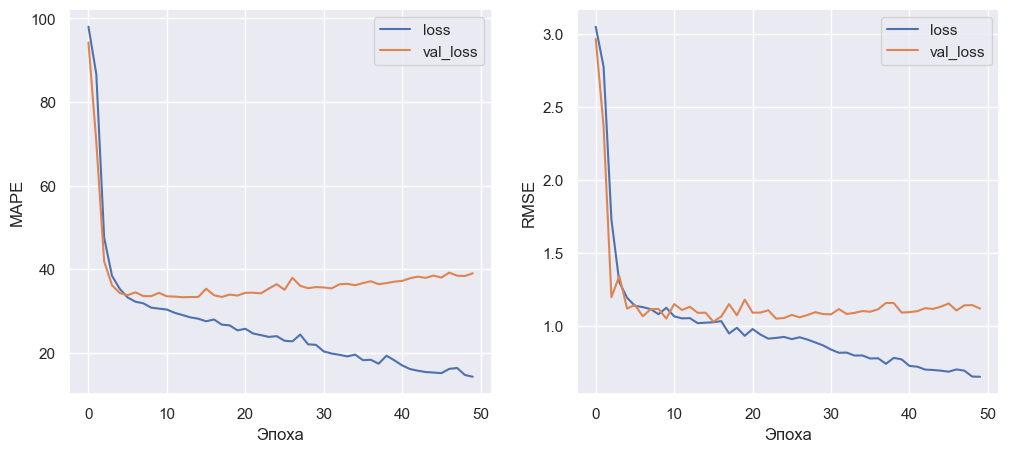

In [201]:
plot_loss(history.history)

In [202]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 33.8822 - root_mean_squared_error: 1.0656


[33.88217544555664, 1.065582036972046]

In [203]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

10/10 [==============================] - 0s 2ms/step


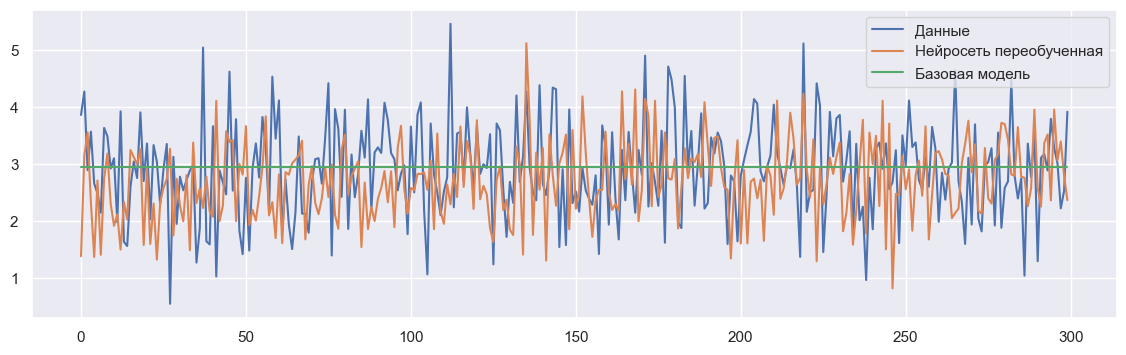

In [204]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробуем раннюю остановку процесса обучения для борьбы с переобучением

In [205]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [206]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 96.3156 - root_mean_squared_error: 3.0143 - val_loss: 86.4012 - val_root_mean_squared_error: 2.7778
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 67.2121 - root_mean_squared_error: 2.3217 - val_loss: 38.9680 - val_root_mean_squared_error: 1.4425
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 41.4270 - root_mean_squared_error: 1.3831 - val_loss: 35.8034 - val_root_mean_squared_error: 1.3242
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 36.9961 - root_mean_squared_error: 1.3242 - val_loss: 33.7382 - val_root_mean_squared_error: 1.1330
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 34.8704 - root_mean_squared_error: 1.1761 - val_loss: 33.0259 - val_root_mean_squared_error: 1.1314
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 33.2239 - root_mean_squared_error: 1.1287 - val_loss: 32.6062 - val

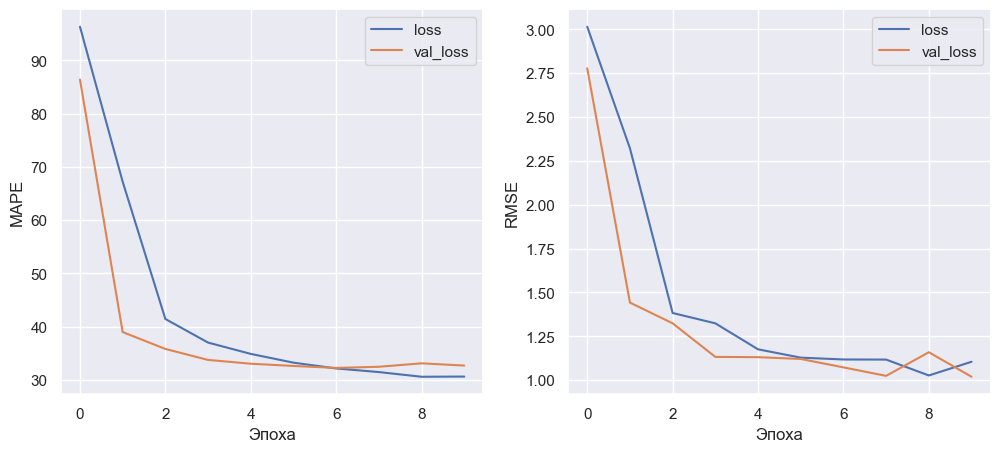

In [207]:
plot_loss(history.history)

In [208]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 1ms/step - loss: 28.1184 - root_mean_squared_error: 0.9086


[28.118391036987305, 0.9085581302642822]

In [209]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

10/10 [==============================] - 0s 1ms/step


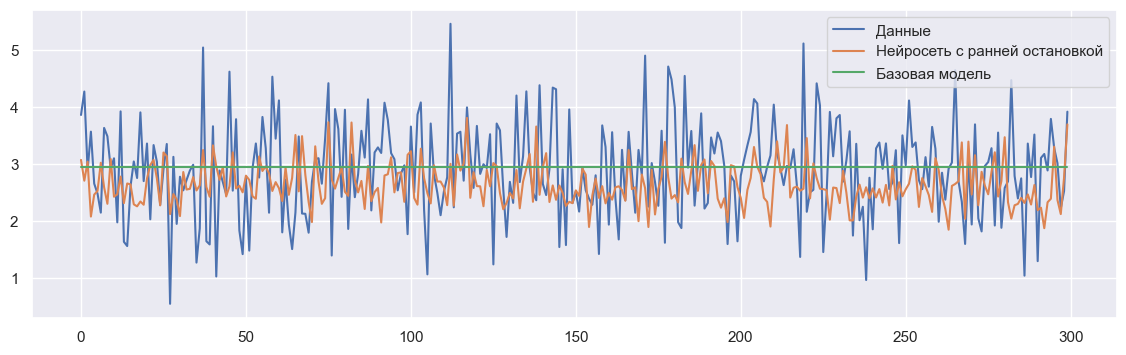

In [210]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [211]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [212]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [213]:
# Архитектура изменилась
model3_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [214]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 14ms/step - loss: 95.1363 - root_mean_squared_error: 2.9779 - val_loss: 86.5655 - val_root_mean_squared_error: 2.7921
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 70.9709 - root_mean_squared_error: 2.4005 - val_loss: 49.3383 - val_root_mean_squared_error: 1.7663
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 43.8172 - root_mean_squared_error: 1.5109 - val_loss: 38.9023 - val_root_mean_squared_error: 1.2457
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 40.6677 - root_mean_squared_error: 1.4207 - val_loss: 37.8539 - val_root_mean_squared_error: 1.3317
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 39.8168 - root_mean_squared_error: 1.3516 - val_loss: 36.6431 - val_root_mean_squared_error: 1.2923
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 37.6779 - root_mean_squared_error: 1.3375 - val_loss: 34.9795 - val

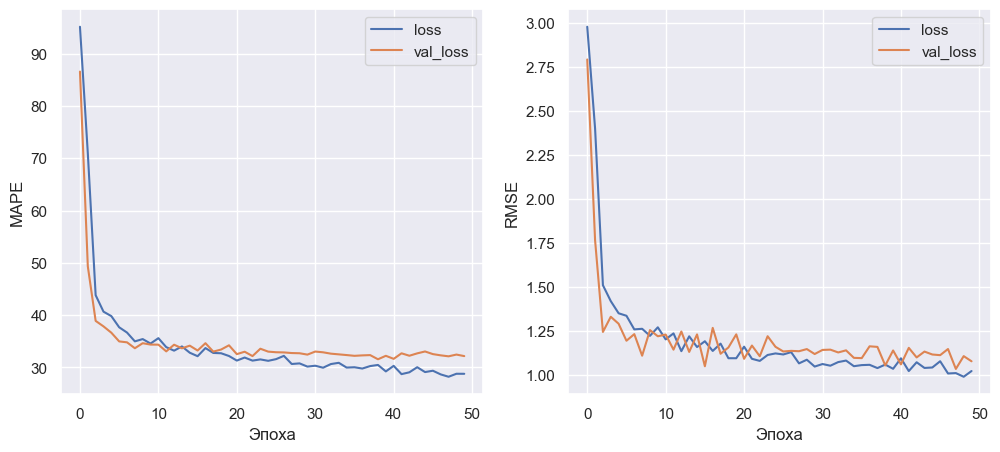

In [215]:
plot_loss(history.history)

In [216]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 28.9933 - root_mean_squared_error: 0.9795


[28.993343353271484, 0.979481041431427]

In [217]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

10/10 [==============================] - 0s 889us/step


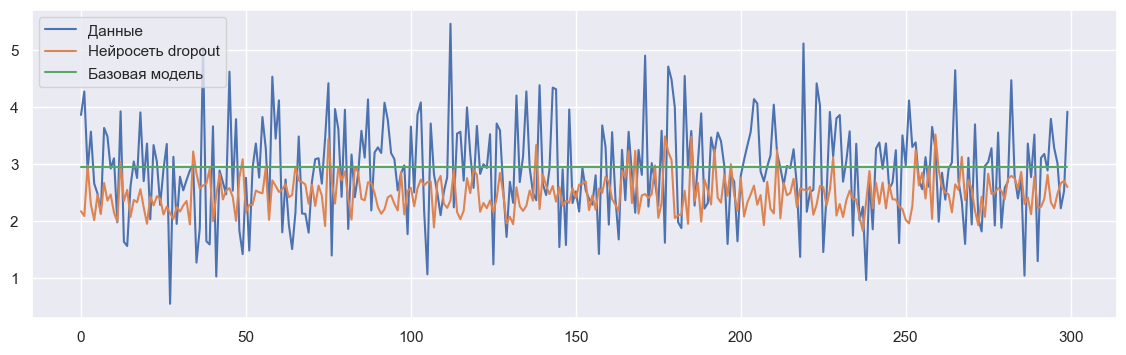

In [218]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [219]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))
compare3_2

C:\Users\ramil\AppData\Local\Temp\ipykernel_16056\793482922.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
C:\Users\ramil\AppData\Local\Temp\ipykernel_16056\793482922.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
C:\Users\ramil\AppData\Local\Temp\ipykernel_16056\793482922.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))


R2      RMSE       MAE      MAPE  \
DummyRegressor                -0.004784  0.837505  0.659057  0.287431   
Нейросеть переобученная       -0.626564  1.065582  0.864584  0.338822   
Нейросеть с ранней остановкой -0.182504  0.908558  0.732621  0.281184   
Нейросеть dropout             -0.374325  0.979481  0.791632  0.289933   

                               max_error  
DummyRegressor                  2.501931  
Нейросеть переобученная         3.161953  
Нейросеть с ранней остановкой   2.543703  
Нейросеть dropout               3.092304

Нейросеть из библиотеки tensorflow старалась подстроиться к данным. Выглядят результаты «похоже» и красиво, но метрики разочаровывают. Лучшая обобщающая спрособность и меньшие значения ошибок на тестовом множестве оказались у нейросети, обученной с ранней остановкой. Но она тоже предсказывает гораздо хуже базовой модели.

## Оценить точность модели на тренировочном и тестовом датасете

In [220]:
## Модель для модуля упругости при растяжении
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=4344, splitter='random')

In [221]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.002700  3.195467  2.557720  0.034871   
Модуль упругости, тестовый      -0.013159  2.912794  2.302184  0.031535   

                                 max_error  
Модуль упругости, тренировочный   9.474377  
Модуль упругости, тестовый        8.092000

Дерево решений имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. Но даже на тренировочном датасете оно не нашло закономерности во входных данных.

In [222]:
## Модель для прочности при растяжении
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50,
                          random_state=4344)

In [223]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении, тренировочный  0.065439  463.871452  369.521101   
Прочность при растяжении, тестовый      -0.023595  498.992530  387.420047   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный  0.163960  1384.350627  
Прочность при растяжении, тестовый       0.163368  1392.474237

Градиентный бустинг - это прекрасный метод, который показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно больше, чем на тренировочном. Значит, модель нашла следы зависимости, а не выучила данные.

In [224]:
## Модель для соотношения матрица-наполнитель
model3_3

In [225]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

10/10 [==============================] - 0s 1ms/step


R2      RMSE       MAE  \
Соотношение матрица-наполнитель, тренировочный -0.143701  1.002351  0.797981   
Соотношение матрица-наполнитель, тестовый      -0.182504  0.908558  0.732621   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный  0.307240   3.093135  
Соотношение матрица-наполнитель, тестовый       0.281184   2.543703

У нейросети показатели для тестовой выборки сильнее отличаются в худшую сторону от показателей тренировочной. Она не нашла закономерностей, а стала учить данные из тестовой выборки.

## Разработать приложение 

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

Решено разработать веб-приложение с помощью языка Python, фреймворка Flask и шаблонизатора Jinja.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [226]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [227]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [228]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [229]:
save_object_with_pickle(best_model1, 'model1_best')

In [230]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [231]:
save_object_with_pickle(best_model2, 'model2_best')

In [232]:
save_object_with_pickle(preprocessor3, 'preprocessor3')

In [233]:
save_object_with_pickle(model3_1, 'model3_1')

In [234]:
model3_2.save(models_path + '/model3_2/')

INFO:tensorflow:Assets written to: ../models//model3_2/assets


In [235]:
model3_3.save(models_path + '/model3_3/')

INFO:tensorflow:Assets written to: ../models//model3_3/assets


In [236]:
model3_4.save(models_path + '/model3_4/')

INFO:tensorflow:Assets written to: ../models//model3_4/assets


In [237]:
# Проверяю загрузку

In [238]:
preprocessor1 = load_object_with_pickle('preprocessor1')
best_model1 = load_object_with_pickle('model1_best')
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=4344, splitter='random')

In [239]:
preprocessor2 = load_object_with_pickle('preprocessor2')
best_model2 = load_object_with_pickle('model2_best')
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50,
                          random_state=4344)

In [240]:
preprocessor3 = load_object_with_pickle('preprocessor3')
model3_1 = load_object_with_pickle('model3_1')
model3_1

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=4344, validation_fraction=0.3, verbose=True)

In [241]:
model3_2 = keras.models.load_model(models_path + '/model3_2/')
model3_2

In [242]:
model3_3 = keras.models.load_model(models_path + '/model3_3/')
model3_3

In [243]:
model3_4 = keras.models.load_model(models_path + '/model3_4/')
model3_4

# Так как на моем компьютере старый процессор, библиотека tensorflow не заработала. 
# В приложение буду встраивать нейросеть, полученную с помощью MLPRegressor.
# Она по метрикам хуже нейросети, полученной с помощью tensorflow,
# но все они плохи.
# Поэтому использую MLPRegressor и проверю работоспособность приложения

# Примеры для тестирования модели в приложении для задач 1 и 2

In [244]:
# Вход
x1.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [245]:
# Выход
sample_x = preprocessor1.transform(x1.iloc[[19], :])
best_model1.predict(sample_x)

array([73.52843767])

In [246]:
# Вход
x2.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [247]:
# Выход
sample_x = preprocessor2.transform(x2.iloc[[19], :])
best_model2.predict(sample_x)

array([2516.91785098])

In [248]:
# Примеры для тестирования модели в приложении для задачи 3

In [249]:
# Вход
x3.iloc[19, :].values.astype(str)

array(['1880.0', '622.0', '111.86', '22.2678571428571',
       '284.615384615384', '470.0', '73.3333333333333',
       '2455.55555555555', '220.0', '90.0', '4.0', '60.0'], dtype='<U32')

In [250]:
# Выход
sample_x = preprocessor3.transform(x3.iloc[[19], :])
model3_1.predict(sample_x)

array([2.56836275])